### Today we're going to spend some time working with NFL Combine data from 1999-2014
###### I can't speak 100% to the validity of all of the picks in the draft, numbers, etc. but it seems accurate enough for our needs, however, there is some dirty data

- Going to bring in data from a csv flat-file (Thanks to NFL Savant for this open data! http://nflsavant.com/about.php)
- Do some very quick "EDA" (exploratory data analysis) with it (some using matplotlib and seaborn)
- Clean it up a little bit using both in-built and a custom function that we make
- Showcase some different plotting options with matplotlib (check out https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70 for some more ideas)
- Some of you may want to try to "conda install -c anaconda seaborn" or "pip install seaborn"

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### It is always worth taking the time to do some quick things with your data to check it and prepare for any kind of cleaning
- Checking df.info() and comparing what you see in df.head() will allow you to get a quick glance at the column data and see if the types seem okay...
- If you see anything weird or anomalous, check it out. You are the data scientist/analyst/engineer, and you will want to be able to speak to any assumptions that you make or any cleaning you do
- The more mission-critical this data is or the bigger the decisions that will be made on it, the more time you should spend on eda/prep. This is will be a big part of your life in the field!
- Note the lines that contain "display(stuff)", this is a jupyter-specific display command that you can use to show multiple outputs in the same cell, sometimes getting more info physically closer together on your screen will help you (though you'll want to practice with it so that you can understand the behavior some more)
- NOTE: If we were data scientists on an NFL team's payroll, we would not have done enough to prep, display, OR analyze this data!!!

In [2]:
combine = pd.read_csv('combine.csv', usecols=range(0,26))

combine = combine[['year', 'name', 'firstname', 'lastname', 'position', 'heightfeet',
       'heightinches', 'heightinchestotal', 'weight', 'arms', 'hands',
       'fortyyd', 'threecone', 'vertical', 'broad', 'bench', 'round',
       'college', 'pickround', 'picktotal']]

display(combine.head())

display('\n\n Hi I am a spacer 1 \n\n')
#print('\n\n Hi I am a spacer 2\n\n')
#display(print('\n\n Hi I am a spacer 3\n\n'))

display(combine.info())

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,threecone,vertical,broad,bench,round,college,pickround,picktotal
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0000,69.0,205.0,0.0,0.0,4.60,6.79,42.5,130.0,24.0,0,Nebraska,0,0.0
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0000,72.0,198.0,0.0,0.0,4.42,0.00,0.0,0.0,12.0,0,USC,0,0.0
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0000,72.0,221.0,0.0,0.0,4.57,7.10,39.0,121.0,19.0,0,Boise St.,0,0.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0000,73.0,227.0,0.0,0.0,4.55,7.14,36.0,121.0,24.0,0,LSU,0,0.0
4,2015,Mario Alford,Mario,Alford,WR,5,8.0000,68.0,180.0,0.0,0.0,4.43,6.64,34.0,121.0,13.0,0,West Virginia,0,0.0


'\n\n Hi I am a spacer 1 \n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 20 columns):
year                 4947 non-null int64
name                 4947 non-null object
firstname            4947 non-null object
lastname             4947 non-null object
position             4947 non-null object
heightfeet           4947 non-null object
heightinches         4947 non-null object
heightinchestotal    4947 non-null float64
weight               4947 non-null float64
arms                 4947 non-null float64
hands                4947 non-null float64
fortyyd              4947 non-null float64
threecone            4947 non-null float64
vertical             4947 non-null float64
broad                4947 non-null float64
bench                4947 non-null float64
round                4947 non-null int64
college              3477 non-null object
pickround            4947 non-null object
picktotal            4945 non-null float64
dtypes: float64(10), int64(2), object(8)
memo

None

#### Some things that jump out to me as limitations of the data
- Whoever compiled this data didn't include the team that each player ended up on (!!!)
- There are some columns that appear to be numerical and have the object type, this is a dead giveaway that you have some dirty numerical data
-- Some examples appear to be heightfeet, heightinches, and pickround
-- You may want to treat some of these as categorical data (we will discuss categorical vs numeric data more in class)
-- Some info on this: https://www.formpl.us/blog/categorical-numerical-data
- You always have to investigate columns to understand what is causing any weird behavior, lets check out the ones mentioned above, and there will be some other anomalies we'll get into below as well.

In [3]:
def check_numeric(inpnum):
    try:
        return(float(inpnum))
    except:
        return(np.NaN)
    
display(combine[combine.heightfeet.apply(check_numeric).isna()])
print("\n\n Above, we apply the function that was written in this cell to a column in our table and use it for boolean indexing, below we do the same with the pd.to_numeric function\n\n")
display(combine[combine.heightfeet.apply(pd.to_numeric, errors = 'coerce').isna()])

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,threecone,vertical,broad,bench,round,college,pickround,picktotal
95,2015,Mario Edwards,Jr.,Mario,Edwards,Jr.,DT,6.0,3.0,75.0,279.0,0.0,0.0,4.55,7.44,32.5,120,32,Florida St.,NaN
109,2015,Dante Fowler,Jr.,Dante,Fowler,Jr.,OLB,6.0,3.0,75.0,261.0,0.0,0.0,4.32,7.40,32.5,112,19,Florida,NaN




 Above, we apply the function that was written in this cell to a column in our table and use it for boolean indexing, below we do the same with the pd.to_numeric function




,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,threecone,vertical,broad,bench,round,college,pickround,picktotal
95,2015,Mario Edwards,Jr.,Mario,Edwards,Jr.,DT,6.0,3.0,75.0,279.0,0.0,0.0,4.55,7.44,32.5,120,32,Florida St.,NaN
109,2015,Dante Fowler,Jr.,Dante,Fowler,Jr.,OLB,6.0,3.0,75.0,261.0,0.0,0.0,4.32,7.40,32.5,112,19,Florida,NaN


## It looks like these guys are problematic (possibly because they have a Jr. in their name and it may have shifted a column)
- Note that we were able to do 3 different things that all yielded the same output in the last cell and the cell below
- I can't stress enough, there is no "right" way to do things in many parts of the data world. There are best-practices, but you will find things that work for you, shortcuts that suit you, and logic that you process most easily, do your best to stick to best practices, but small snippets of code over small datasets will run very quickly anyway, if you don't remember the most efficient way to do something and believe that it will help you to learn the fastest way then you can look it up and learn it over time. However, do your best to get up and running most quickly by trying several ways and see what is easiest for you to remember.
-- First we applied my custom function to the heightfeet column and filtered the dataframe to show which rows the null values would live (this is done in the first line of code in the cell below as well)
-- Second we tried to apply the pd.to_numeric function on the heightfeet column and coerced the errors, which will place NaNs where there is an error (a useful trick), and then filtered out the null values only
-- Third (last line of code in the next cell) we use the '~' operator to filter a dataframe (https://stackoverflow.com/questions/46054318/tilde-sign-in-python-dataframe/46054376) AND .notna()

In [4]:
display(combine[combine.heightinches.apply(check_numeric).isna()])

print("\n\n Like we're always saying, there are a ton of ways to skin a cat, \n\n")

display(combine[~combine.pickround.apply(pd.to_numeric, errors = 'coerce').notna()])

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,threecone,vertical,broad,bench,round,college,pickround,picktotal
95,2015,Mario Edwards,Jr.,Mario,Edwards,Jr.,DT,6.0,3.0,75.0,279.0,0.0,0.0,4.55,7.44,32.5,120,32,Florida St.,NaN
109,2015,Dante Fowler,Jr.,Dante,Fowler,Jr.,OLB,6.0,3.0,75.0,261.0,0.0,0.0,4.32,7.40,32.5,112,19,Florida,NaN




 Like we're always saying, there are a ton of ways to skin a cat, 




,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,threecone,vertical,broad,bench,round,college,pickround,picktotal
95,2015,Mario Edwards,Jr.,Mario,Edwards,Jr.,DT,6.0,3.0,75.0,279.0,0.0,0.0,4.55,7.44,32.5,120,32,Florida St.,NaN
109,2015,Dante Fowler,Jr.,Dante,Fowler,Jr.,OLB,6.0,3.0,75.0,261.0,0.0,0.0,4.32,7.40,32.5,112,19,Florida,NaN


#### This line will set all of the names that are left to a new dataframe called cl_combine by filtering on a column that you have applied a function to and then dropping NaN rows (NOTE: In this specific situation those NaN's are all the two rows that you see above)

In [5]:
cl_combine = combine[combine.pickround.apply(pd.to_numeric, errors = 'coerce').notna()]

display(f"Combine Len : {len(combine)}")
display(f"Clean Combine Len : {len(cl_combine)}")

'Combine Len : 4947'

'Clean Combine Len : 4945'

In [6]:
display(print("Here are the counts by year\n\n"), cl_combine.groupby(by = 'year').count().sort_index(ascending = False))

display(print("Here are the means by year\n\n"), cl_combine.groupby(by = 'year').mean().sort_index(ascending = False))

display(print("Just want to show that there are unfortunately issues with 2015 data"), cl_combine.loc[cl_combine.year == 2015, :].head())

Here are the counts by year




None

,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,threecone,vertical,broad,bench,round,college,pickround,picktotal
year,,,,,,,,,,,,,,,,,,,
2015,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320
2014,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335
2013,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,193,287,287
2012,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,207,314,314
2011,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,195,303,303
2010,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,192,290,290
2009,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,191,285,285
2008,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,187,269,269
2007,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,182,271,271


Here are the means by year




None

,heightinchestotal,weight,arms,hands,fortyyd,threecone,vertical,broad,bench,round,picktotal
year,,,,,,,,,,,
2015,73.878125,244.584375,0.000000,0.000000,3.863594,4.657781,26.035937,88.825000,14.009375,0.000000,0.000000
2014,73.743284,242.185075,0.000000,0.000000,3.810896,4.804597,26.423881,89.617910,14.829851,2.749254,77.623881
2013,73.780488,246.526132,32.460801,9.559669,4.530871,5.158188,27.991289,102.668990,16.449477,2.644599,77.822300
2012,73.509952,244.831210,22.206210,6.526274,4.136624,5.128471,28.076433,91.675159,16.547771,2.582803,77.248408
2011,73.829620,245.389439,32.290116,9.575908,4.765314,0.901914,29.407591,96.290429,18.006601,2.468647,71.366337
2010,74.212931,244.537931,32.512931,9.568534,4.762966,0.860103,28.970690,92.465517,17.524138,2.513793,73.768966
2009,74.059649,246.789474,3.829825,1.110526,4.786877,0.664105,29.245614,97.729825,18.231579,2.607018,78.143860
2008,73.960502,239.315985,0.704461,0.214219,4.748699,0.284238,28.139405,105.784387,16.256506,2.643123,77.609665
2007,74.132841,243.195572,1.222786,0.378690,4.769815,0.357491,29.370849,98.376384,16.468635,2.601476,78.332103


Just want to show that there are unfortunately issues with 2015 data


None

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,threecone,vertical,broad,bench,round,college,pickround,picktotal
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0000,69.0,205.0,0.0,0.0,4.60,6.79,42.5,130.0,24.0,0,Nebraska,0,0.0
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0000,72.0,198.0,0.0,0.0,4.42,0.00,0.0,0.0,12.0,0,USC,0,0.0
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0000,72.0,221.0,0.0,0.0,4.57,7.10,39.0,121.0,19.0,0,Boise St.,0,0.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0000,73.0,227.0,0.0,0.0,4.55,7.14,36.0,121.0,24.0,0,LSU,0,0.0
4,2015,Mario Alford,Mario,Alford,WR,5,8.0000,68.0,180.0,0.0,0.0,4.43,6.64,34.0,121.0,13.0,0,West Virginia,0,0.0


### As we keep searching for anomalies in our data, we just took a look at the following...
- Count of all of the data, if it looked like we had a ridiculous number of NaNs in any of the years, we would consider dropping some
- Averages of all of the data, again, we are looking for anomalies here, in the real world you may have many reasons to drop data, but we are basically just looking for an average of 0 or numbers that are basically impossible in the real world
-- It looks like 2015 has some zeroes on the round numbers, so we may have to drop it if we're looking at round number
-- It also it looks like arm and hand measurements are swinging rapidly year to year.
-- Sadly we'll drop 2015 due to botched round counts, and it looks like the arms and hands columns are nearly worthless (We'll drop all but 2010, 2011, 2012, 2013 when we look at those 2)
-- Also, it looks like threecone is useless as well (the record since 2006 was 6.28 seconds, so it's safe to say we have a lot of zeroes if we're averaging below that every year), we drop it.

### Below, we do something interesting, we make a scatter matrix, this is theoretically an easy way to check for some more weirdness in our data
- First line of code makes a smaller scattermatrix quietly (you can surpress matplotlib output with the semicolon (;)
- Second (commented) one makes a larger one and shows us the way that the grid we see is made up of different matplotlib objects on a large axis
- Both of these use matplotlib to build us a grid of different plots comparing all of our various numerical data, and can be very useful for initial EDA both to find zeroes and patterns

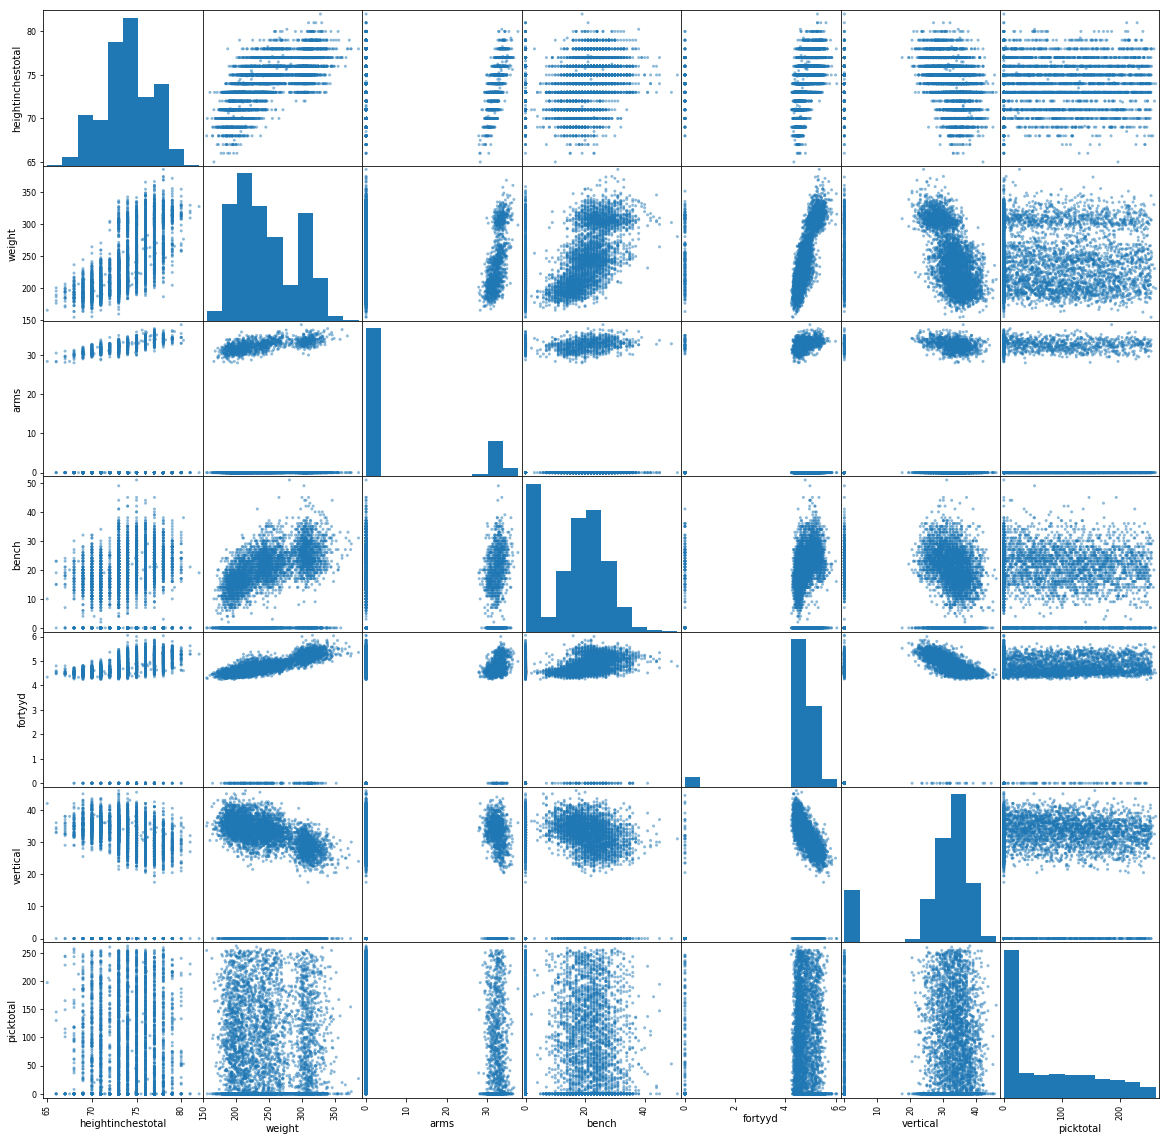

In [7]:
pd.plotting.scatter_matrix(cl_combine[['heightinchestotal', 'weight', 'arms', 'bench', 'fortyyd', 'vertical', 'picktotal']], figsize = (20, 20));
#pd.plotting.scatter_matrix(cl_combine, figsize = (30, 30))

,year,heightinchestotal,weight,arms,hands,fortyyd,vertical,broad,bench,round,picktotal
year,1.000,-0.057,-0.025,0.566,0.566,-0.241,-0.050,-0.018,0.076,0.013,0.006
heightinchestotal,-0.057,1.000,0.707,-0.022,-0.023,0.210,-0.151,-0.102,0.183,0.002,-0.001
weight,-0.025,0.707,1.000,-0.023,-0.023,0.278,-0.265,-0.204,0.459,-0.007,-0.008
arms,0.566,-0.022,-0.023,1.000,0.997,-0.062,0.006,0.003,0.040,-0.003,-0.006
hands,0.566,-0.023,-0.023,0.997,1.000,-0.061,0.006,0.001,0.041,-0.005,-0.008
fortyyd,-0.241,0.210,0.278,-0.062,-0.061,1.000,0.218,0.218,0.151,-0.026,-0.016
vertical,-0.050,-0.151,-0.265,0.006,0.006,0.218,1.000,0.751,-0.089,0.025,0.024
broad,-0.018,-0.102,-0.204,0.003,0.001,0.218,0.751,1.000,-0.062,0.020,0.020
bench,0.076,0.183,0.459,0.040,0.041,0.151,-0.089,-0.062,1.000,0.033,0.030
round,0.013,0.002,-0.007,-0.003,-0.005,-0.026,0.025,0.020,0.033,1.000,0.989


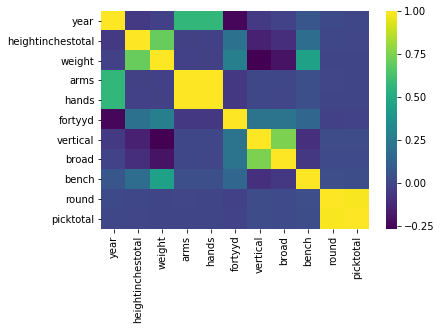

In [8]:
#final cleaning
cl_comb = cl_combine.drop('threecone', axis = 1)
cl_comb = cl_comb[cl_comb.year != 2015]

#What's wrong with this picture?
display(sns.heatmap(cl_comb.corr(), cmap = 'viridis'));

correr = cl_comb.corr().apply(lambda x: round(x, 3))
display(cl_comb.corr().apply(lambda x: round(x, 3)))

### Above, we used pandas.corr() to build up our correlation matrix and then we use seaborn to plot the colors
- What is a correlation matrix? https://www.displayr.com/what-is-a-correlation-matrix/
- These can be used to look how correlated certain numbers are

### Below, we found our previous approach to be a little bit cumbersome to look at, and also found that someone out there online has been pretty brilliant and built us some code to explore...
- This makes us able to not only apply a style to the table and combine the two separate views above
- It also edits our notebook in real-time to allow us to magnify our current selection as we hover (no guarantees with this code working out of the box for many of you, if you uncomment and it breaks you may have to install some notebook packages!)
- Code lifted from this stack exchange page: https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
- We can also play hide and seek with one of the components (hint: you'll have to set one of our parameters to 1 and re-run to see what I mean)
- Don't worry if you don't understand the parts that were originally commented out, we'll discuss html and front-end (which Jupyter is not really considered to be) soon!

In [9]:
#cmap = cmap=sns.viridis
#Full credit to mrandrewandrade on this stack exchange page: https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas

#def magnify():
#    return [dict(selector="th",
#                 props=[("font-size", "7pt")]),
#            dict(selector="td",
#                 props=[('padding', "0em 0em")]),
#            dict(selector="th:hover",
#                 props=[("font-size", "12pt")]),
#            dict(selector="tr:hover td:hover",
#                 props=[('max-width', '200px'),
#                        ('font-size', '50pt')])]

correr.style.background_gradient(cmap= 'viridis' , axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '12pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
#    .set_table_styles(magnify())

,year,heightinchestotal,weight,arms,hands,fortyyd,vertical,broad,bench,round,picktotal
year,1,-0.057,-0.025,0.57,0.57,-0.24,-0.05,-0.018,0.076,0.013,0.006
heightinchestotal,-0.057,1,0.71,-0.022,-0.023,0.21,-0.15,-0.1,0.18,0.002,-0.001
weight,-0.025,0.71,1,-0.023,-0.023,0.28,-0.27,-0.2,0.46,-0.007,-0.008
arms,0.57,-0.022,-0.023,1,1,-0.062,0.006,0.003,0.04,-0.003,-0.006
hands,0.57,-0.023,-0.023,1,1,-0.061,0.006,0.001,0.041,-0.005,-0.008
fortyyd,-0.24,0.21,0.28,-0.062,-0.061,1,0.22,0.22,0.15,-0.026,-0.016
vertical,-0.05,-0.15,-0.27,0.006,0.006,0.22,1,0.75,-0.089,0.025,0.024
broad,-0.018,-0.1,-0.2,0.003,0.001,0.22,0.75,1,-0.062,0.02,0.02
bench,0.076,0.18,0.46,0.04,0.041,0.15,-0.089,-0.062,1,0.033,0.03
round,0.013,0.002,-0.007,-0.003,-0.005,-0.026,0.025,0.02,0.033,1,0.99


### Shameless Plug: https://python-graph-gallery.com/
- It offers charts to do different things and also has nice guidelines to follow to keep charts looking good!
- It also tells you what not to do in the "Bad Chart" section
- It is a great resource, use it!
- Matplotlib documentation is also very useful: https://matplotlib.org/3.1.1/contents.html

In [10]:
cl_comb.college.value_counts().head(10)

Georgia          76
Florida          71
USC              70
LSU              68
Alabama          64
Florida State    63
Notre Dame       61
Oklahoma         59
Nebraska         59
Ohio State       57
Name: college, dtype: int64

#### Some EDA visualizations with different school colors (aka how to work with various matplotlib parameters)
- Here we will talk about changing a bunch of different parameters and making some plots
- We will briefly look at the rcParams built into matplotlib (essentially a giant dictionary with a bunch of stuff appllied to plots by default that you can change)
- Make some plots related to the players of different colleges

In [11]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter

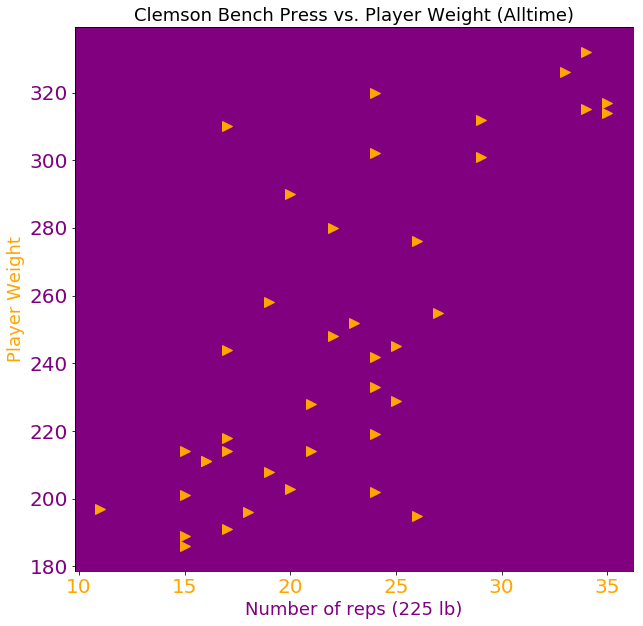

In [12]:
#Grabbing some solid football schools, sorry if yours is not on the list
clem_df = cl_comb[cl_comb.college == 'Clemson']
uga_df = cl_comb[cl_comb.college == 'Georgia']
bama_df = cl_comb[cl_comb.college == 'Alabama']
lsu_df = cl_comb[cl_comb.college == 'LSU']
nd_df = cl_comb[cl_comb.college == 'Notre Dame']

#plotting
plt.figure(figsize = (10, 10))
plt.rcParams['axes.facecolor'] = 'Purple'
plt.plot('bench',\
         'weight',\
         data = clem_df[clem_df.bench != 0],\
         marker = '>',\
         linestyle = 'none',\
         markersize = 10,\
         color = 'orange')
plt.title('Clemson Bench Press vs. Player Weight (Alltime)', size = 18)
plt.xlabel('Number of reps (225 lb)', size = 18, color = 'purple')
plt.ylabel('Player Weight', size = 18, color = 'orange')
plt.xticks(color = 'orange', size = 20)
plt.yticks(color = 'purple', size = 20);

In [13]:
clem_df.sort_values(by = 'bench', ascending = False).head(2)

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,vertical,broad,bench,round,college,pickround,picktotal
1223,2012,Brandon Thompson,Brandon,Thompson,DT,6,2.0000,74.0,314.0,33.5,10.0,0.00,31.0,100.0,35.0,3,Clemson,30,93.0
617,2014,Brandon Thomas,Brandon,Thomas,OT,6,3.0000,75.0,317.0,0.0,0.0,5.09,29.0,98.0,35.0,4,Clemson,4,100.0


#### Above, we took a look at player weight vs. number of reps for Clemson players
- We changed the colors, here's a list of colors available in matplotlib by default https://matplotlib.org/2.0.2/examples/color/named_colors.html
- After making our chart we wanted to look at some of the Clemson guys with the most reps on bench
#### Below, we look at Alabama players, and try to plot their height in inches, vertical leap, player weight (denoted by color), and round picked (denoted by bubble size)
- I know I need to work on my Alabama color pallete
- Below we look at a few of Alabama's (many) first round picks and see if we can try to locate them on our graph
- Something to keep in mind here is that it kind of goes against some unwritten rules, the earlier rounds are smaller circles, usually bigger = better

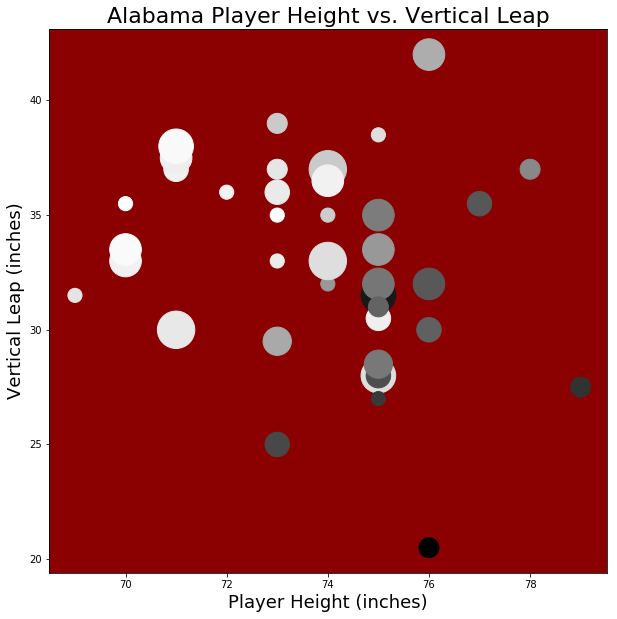

In [14]:
plt.figure(figsize = (10, 10))
plt.rcParams['axes.facecolor'] = 'darkred'
plt.scatter('heightinchestotal',\
            'vertical',\
            data = bama_df[(bama_df.vertical != 0) & (bama_df.round != 0)],\
            s = bama_df[(bama_df.vertical != 0) & (bama_df.round != 0)]['round'] * 200,\
            marker = 'o',\
            c = 'weight',\
            cmap = 'Greys')
plt.title('Alabama Player Height vs. Vertical Leap', size = 22)
plt.xlabel('Player Height (inches)', size = 18, color = 'black')
plt.ylabel('Vertical Leap (inches)', size = 18, color = 'black')
plt.xticks(color = 'black');

In [15]:
bama_df[(bama_df['round'] != 0) & (bama_df['vertical'] != 0)].sort_values(by = 'round')[['year', 'name', 'round', 'position', 'heightinchestotal', 'weight', 'vertical']].head(3)

,year,name,round,position,heightinchestotal,weight,vertical
374,2014,Ha Ha Clinton-Dix,1,FS,73.0,208.0,33.0
1682,2010,Kareem Jackson,1,CB,71.0,196.0,37.5
1395,2011,Julio Jones,1,WR,75.0,220.0,38.5


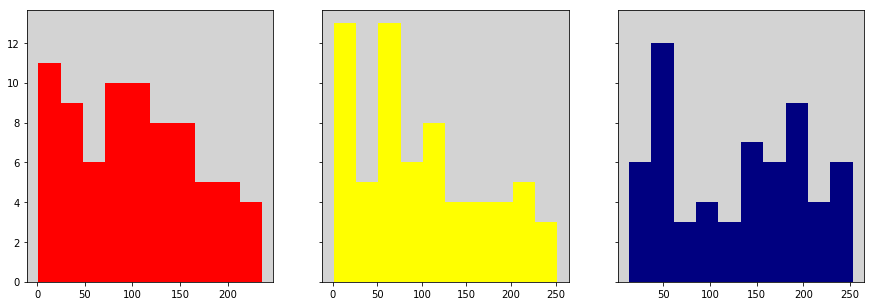

In [16]:
plt.rcParams['axes.facecolor'] = 'lightgrey'
fig, axs = plt.subplots(1, 3, sharey = True, figsize=(15,5))

axs[0].hist(uga_df[uga_df['round'] != 0].picktotal, color = 'red');
axs[1].hist(lsu_df[lsu_df['round'] != 0].picktotal, color = 'yellow');
axs[2].hist(nd_df[nd_df['round'] != 0].picktotal, color = 'navy');

#### Above, we look at some histograms, in this case the x axis is the pick number that a player went, and the y is the count (as is tradition with a histogram), we use it to compare how players that come from UGA, LSU, and Notre Dame
- NOTE: There may be something misleading about this data and the number of bars that we see, does anybody want to guess what it may be?
#### Below, we took a look at the number of players that went in each round of the draft from UGA using an area plot
- We also plot a line on the same axis to look at the average round that players from UGA have been going throughout the years

,round_x,round_y
year,,
1999,6,3.000000
2000,1,7.000000
2001,5,2.400000
2002,6,3.666667
2003,6,2.500000
2004,3,3.000000
2005,6,2.166667
2006,7,4.571429
2007,4,4.000000


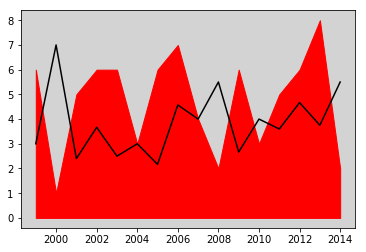

In [17]:
plt.fill_between(data = uga_df.groupby(by = 'year').count(), x = range(1999,2015), y1 = 'round', color = 'red');
#plt.plot(data = uga_df.groupby(by = 'year').mean(),'round', color = 'black')
plt.plot('round', data = uga_df.groupby(by = 'year').mean(), color = 'black')

display(pd.DataFrame(uga_df.groupby(by = 'year').count()['round'])\
        .merge(pd.DataFrame(uga_df.groupby(by = 'year').mean()['round'])\
        , left_index = True, right_index = True))

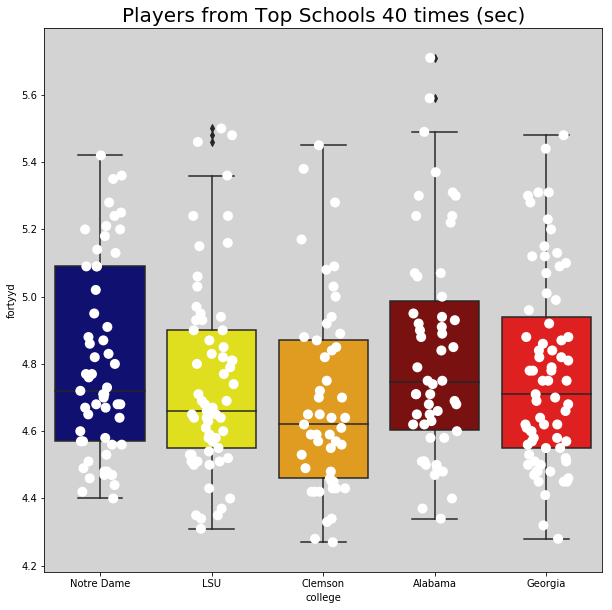

In [18]:
top_schools = cl_comb[cl_comb.college.isin(['Clemson', 'Georgia', 'Alabama', 'LSU', 'Notre Dame'])]
plt.figure(figsize=(10,10))
plt.axes(facecolor = 'lightgrey')

sns.boxplot(data = top_schools[top_schools.fortyyd != 0], x = 'college',\
            y = 'fortyyd',\
            palette = ['navy', 'yellow', 'orange', 'darkred', 'red']);

sns.stripplot(data = top_schools[top_schools.fortyyd != 0],\
              x = 'college',\
              y = 'fortyyd',\
              color = 'white',\
              jitter = .2,\
              size = 10)

plt.yticks()
plt.title('Players from Top Schools 40 times (sec)', size = 20);

#### Above, we look at the boxplot of 40 yard dash times for all players from some top schools
- Also want to show individual 40 times as well as that may add some clarity to the data (https://python-graph-gallery.com/39-hidden-data-under-boxplot/)

#### Below, we look at the same schools and 40 times, but we slice it further to only look at cornerbacks (who are usually pretty fast)
- We don't color the boxes now because we are lazy
- The smaller amount of data will inherently create more varied boxplots
- We will also take a quick look at some 40 times and the amount of players in different positions in our dataset.

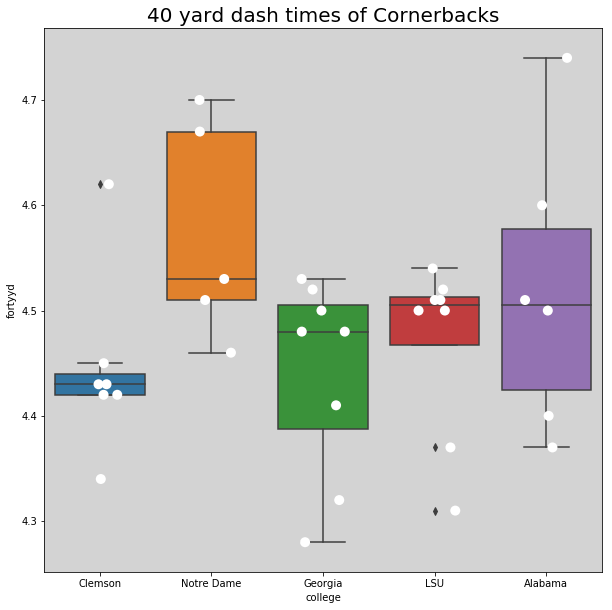

In [19]:
plt.figure(figsize=(10,10))
plt.axes(facecolor = 'lightgrey')
sns.boxplot(data = top_schools[(top_schools.fortyyd != 0) & (top_schools.position == 'CB')],\
            x = 'college',\
            y = 'fortyyd');

sns.stripplot(data = top_schools[(top_schools.fortyyd != 0) & (top_schools.position == 'CB')],\
              x = 'college',\
              y = 'fortyyd',\
              color = 'white',\
              jitter = .2,\
              size = 10);
plt.title('40 yard dash times of Cornerbacks', size = 20);

In [20]:
display(top_schools[top_schools.fortyyd != 0]\
        .head()\
        .sort_values(by = 'fortyyd')\
        [['year', 'name', 'position', 'fortyyd', 'college']])

display(top_schools[top_schools.fortyyd != 0]\
        .sort_values(by = 'fortyyd')\
        .head()\
        [['year', 'name', 'position', 'fortyyd', 'college']])

display(print("\nPositions\n"), top_schools.position.value_counts())

,year,name,position,fortyyd,college
335,2014,Odell Beckham,WR,4.43,LSU
330,2014,George Atkinson,RB,4.48,Notre Dame
343,2014,Alfred Blue,RB,4.63,LSU
334,2014,Lamin Barrow,OLB,4.64,LSU
351,2014,Tajh Boyd,QB,4.84,Clemson


,year,name,position,fortyyd,college
1794,2010,C.J. Spiller,RB,4.27,Clemson
4575,1999,Champ Bailey,CB,4.28,Georgia
1644,2010,Jacoby Ford,WR,4.28,Clemson
1458,2011,Patrick Peterson,CB,4.31,LSU
2793,2006,Tim Jennings,CB,4.32,Georgia



Positions



None

CB     36
DE     33
WR     33
DT     30
RB     27
OLB    23
OT     22
OG     19
QB     18
TE     17
FS     16
SS     16
ILB    15
OC      6
FB      6
P       1
NT      1
Name: position, dtype: int64

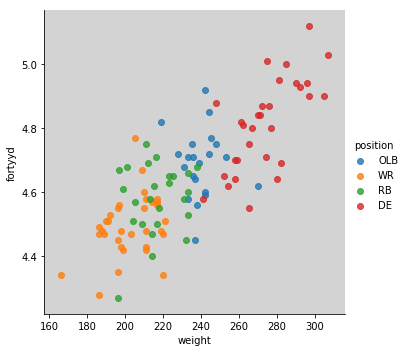

In [21]:
sns.lmplot(x = 'weight', y = 'fortyyd',\
           data=top_schools[(top_schools.weight != 0) &\
                         (top_schools.heightinchestotal != 0) &\
                         (top_schools.fortyyd) &\
                         (top_schools.picktotal != 0) &\
                         (top_schools.position.isin(['OLB', 'WR', 'RB', 'DE']))], hue = 'position', \
                          fit_reg = False);

#### Scatterplots with categorical colors (this is the same exact underlying data in each scatterplot, but the color is changed between the two.)
- Top is broken out by position
- Bottom is broken out by school
- So this should make sense, heavier guys are on average going to be a little bit slower, but it doesn't matter what school you're from, the uniform on your back on average won't make you faster or slower (though I'm sure there are some strength/conditioning coaches that'd argue that one)

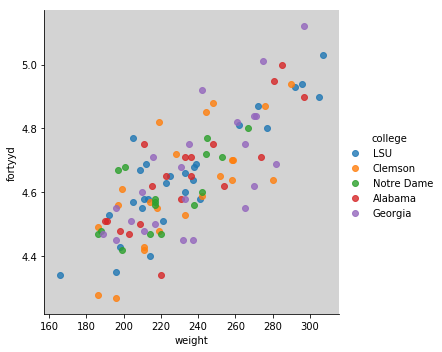

In [22]:
sns.lmplot(x = 'weight', y = 'fortyyd',\
           data=top_schools[(top_schools.weight != 0) &\
                         (top_schools.heightinchestotal != 0) &\
                         (top_schools.fortyyd) &\
                         (top_schools.picktotal != 0) &\
                         (top_schools.position.isin(['OLB', 'WR', 'RB', 'DE']))], hue = 'college', \
                          fit_reg = False)

### So which school is the best?

In [23]:
display(top_schools[top_schools['picktotal'] != 0]\
        .groupby(by = 'college')\
        .mean())

display(top_schools[top_schools['picktotal'] != 0]\
        .groupby(by = 'college')\
        .count()['name'])

,year,heightinchestotal,weight,arms,hands,fortyyd,vertical,broad,bench,round,picktotal
college,,,,,,,,,,,
Alabama,2008.333333,73.733333,253.866667,11.368750,3.358333,4.188000,23.175000,77.866667,12.466667,3.383333,95.750000
Clemson,2007.860000,73.692500,241.120000,11.850000,3.442500,4.596400,29.320000,100.780000,17.900000,3.980000,118.120000
Georgia,2006.578947,74.184211,251.144737,8.633224,2.508224,4.456842,30.565789,96.078947,17.763158,3.552632,101.710526
LSU,2008.353846,73.642308,242.630769,12.155769,3.484615,4.515231,29.092308,95.753846,11.030769,3.492308,99.246154
Notre Dame,2006.683333,74.550000,251.550000,6.416667,1.872917,4.488167,28.375000,96.233333,15.733333,4.183333,127.716667


college
Alabama       60
Clemson       50
Georgia       76
LSU           65
Notre Dame    60
Name: name, dtype: int64

### Here we take a brief look at all of the averages of our "top schools" and then plot them in a bar chart below
- This bar chart has something cool going on as well as something slightly incorrect...
- The bars are not only using height to show data, but also width (this may not be best-practices or very relevant but I just want to take the opportunity to show how to handle different bar widths)
- This is an example of shorter bar =/= better. A lower average pick number would mean that your players are getting taken earlier in the draft

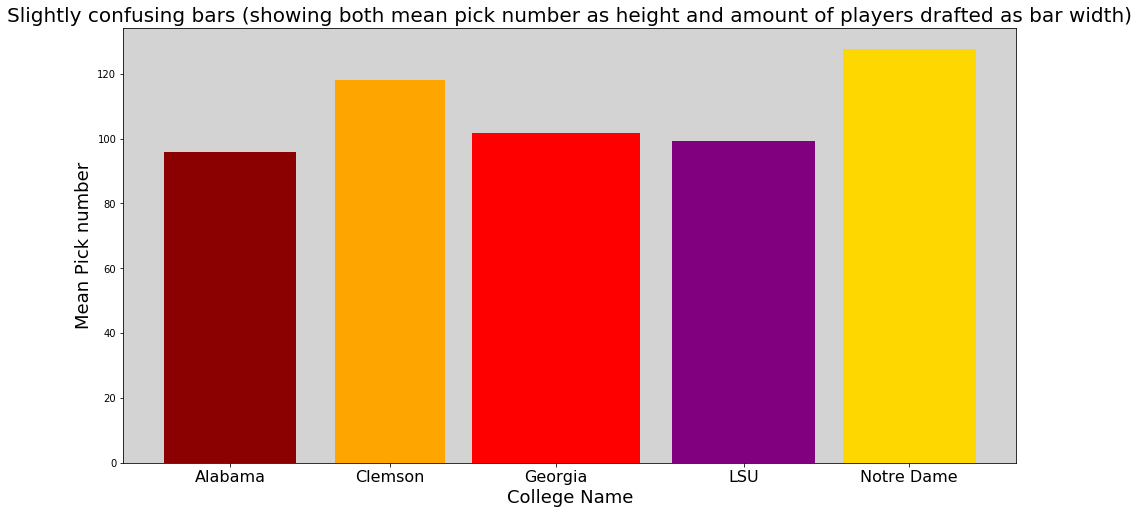

In [24]:
height = top_schools[top_schools.picktotal != 0].groupby(by = 'college').mean()['picktotal']
bars = ['Alabama', 'Clemson', 'Georgia', 'LSU', 'Notre Dame']
bar_pos = [45, 190, 340, 510, 660]
width = top_schools[top_schools.picktotal != 0].groupby(by = 'college').count()['name']*2

plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.rcParams['figure.figsize'] = (16,8)
plt.figsize =(10,20)
plt.bar(bar_pos, height, width = width, color = ['darkred', 'orange', 'red', 'purple', 'gold'])
plt.xticks(bar_pos, bars, size = '16')
plt.xlabel('College Name', size = '18')
plt.ylabel('Mean Pick number', size = '18')
plt.title('Slightly confusing bars (showing both mean pick number as height and amount of players drafted as bar width)', size = 20);

# Hope this helped, thanks for attending!

### some undeleted tabs/references in no particular order

- https://python-graph-gallery.com/barplot/
- https://python-graph-gallery.com/82-marginal-plot-with-seaborn/
- https://stackoverflow.com/questions/47185432/convert-data-frame-to-numeric-and-dropna
- https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
- https://benalexkeen.com/correlation-in-python/